# Word2vec

In [31]:
sentences = [['this', 'is', 'a', 'first', 'example', 'of', 'text'],
    ['this', 'is', 'the', 'second', 'example'],
    ['yet', 'another', 'example'],
    ['one', 'more', 'example'],
    ['and', 'the', 'final', 'example']]

In [32]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1, size=10,window=3)
print(model)


Word2Vec(vocab=15, vector_size=10, alpha=0.025)


In [33]:
words = list(model.wv.key_to_index)
print(words)



['this', 'is', 'a', 'first', 'example', 'of', 'text', 'the', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [35]:

print("v(final)="+str(model.wv['final']))

# save model
model.save('model.bin')

v(final)=[-0.00838302 -0.00762286  0.002421    0.04210151  0.01538225  0.0485583
  0.0471771  -0.01081826 -0.02978351  0.0048116 ]


In [36]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=15, size=10, alpha=0.025)


In [6]:
X = model.wv[new_model.wv.key_to_index]

In [7]:
X.shape

(15, 10)

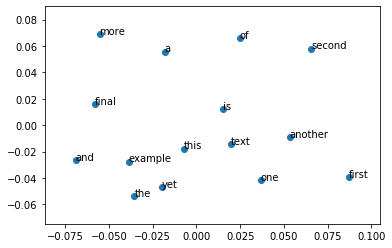

In [37]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [38]:
import gensim.downloader as api

In [39]:
corpus = api.load('text8')

In [40]:
type(corpus)


text8.Dataset

In [41]:
from gensim.models.word2vec import Word2Vec
model8= Word2Vec(corpus)

In [42]:
model8.wv['tree']

array([-1.6132092 , -0.29300657, -0.50139546, -0.5010407 ,  0.714423  ,
        2.3331754 ,  2.4868405 ,  0.06126402, -1.0913444 , -1.6310669 ,
        0.22873208, -1.9608723 , -0.1276393 , -0.02345567,  0.8407076 ,
       -1.4398854 ,  0.74379015, -1.3725604 , -1.3626713 , -0.8271638 ,
        1.6896709 , -0.6721991 , -0.8903376 ,  1.1358778 ,  1.2571651 ,
       -0.8668864 , -0.60121745,  0.8326988 , -1.5282272 ,  0.32429844,
       -0.09567533,  0.3920102 ,  0.7276306 , -0.49076718,  0.6291795 ,
        0.4229488 ,  0.9692776 , -0.19127114,  2.6236336 , -3.199736  ,
        2.506504  ,  1.0536284 ,  1.2412459 ,  1.6476907 , -1.0385286 ,
        2.2076826 ,  0.21687274, -0.9185627 ,  0.81349504,  0.1753415 ,
        0.6532633 , -2.9670143 ,  0.7623773 ,  2.4124467 , -0.6925945 ,
        1.241021  , -1.6026771 ,  1.0704794 , -1.1804019 , -0.29548848,
       -0.0672432 , -1.6857744 , -0.9434806 ,  0.78773755, -1.0026716 ,
        1.8816489 ,  0.83467704,  0.62095094,  0.12035852, -0.89

In [43]:
print(model8.wv.most_similar('tree'))

[('trees', 0.7098380327224731), ('leaf', 0.6928229331970215), ('bark', 0.6682659983634949), ('avl', 0.6293134689331055), ('cactus', 0.6237969398498535), ('flower', 0.6063824892044067), ('fruit', 0.6052535772323608), ('bird', 0.6039189696311951), ('sap', 0.5988777875900269), ('pond', 0.577660322189331)]


In [44]:
print(model8.wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/home/mausoto/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


# Analogies

In [45]:
#v(king)-v(man)+v(woman)
print(model8.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.7033005952835083), ('elizabeth', 0.6463834047317505), ('princess', 0.6308132410049438)]


In [52]:
print(model8.wv.most_similar(positive=['italy', 'renault'], negative=['france'], topn=3))


[('scuderia', 0.6892913579940796), ('chevrolet', 0.686715304851532), ('enzo', 0.6779664754867554)]


In [49]:
print(model8.wv.most_similar(positive=['france', 'rome'], negative=['italy'], topn=3))


[('constantinople', 0.6600745320320129), ('jerusalem', 0.5885696411132812), ('pope', 0.5852988958358765)]


In [47]:
print(model8.wv.most_similar(positive=['usa', 'beatles'], negative=['england'], topn=3))

[('dj', 0.669877290725708), ('snoop', 0.6129137277603149), ('jam', 0.5976452827453613)]


In [51]:
model8.wv.most_similar(['apple','orange'])

[('lotus', 0.6553363800048828),
 ('jaguar', 0.6314786672592163),
 ('mcintosh', 0.6247859001159668),
 ('lemon', 0.6120587587356567),
 ('onion', 0.5979021787643433),
 ('pepper', 0.5953255891799927),
 ('juice', 0.5919716954231262),
 ('logo', 0.5903009176254272),
 ('iic', 0.5836294293403625),
 ('iie', 0.5831707715988159)]

##  Loading pre-trained models

In [54]:
# Load pretrained model GoogleNews-vectors-negative300.bin.gz
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [55]:
print(model.most_similar('tree'))

[('trees', 0.8293122053146362), ('pine_tree', 0.7622087001800537), ('oak_tree', 0.731893002986908), ('evergreen_tree', 0.6926872730255127), ('fir_tree', 0.6917217969894409), ('willow_tree', 0.6845874190330505), ('pine_trees', 0.6824266910552979), ('maple_tree', 0.6803498268127441), ('sycamore_tree', 0.6681811213493347), ('tress', 0.6547873020172119)]


In [32]:
print(model.most_similar(positive=['germany', 'monarchy'], negative=['netherlands'], topn=3))


[('Monarchy', 0.4897083640098572), ('constitutional_monarchy', 0.48723936080932617), ('royalists', 0.45945388078689575)]


In [30]:
print(model.most_similar(positive=['italy', 'manchester_united'], negative=['england'], topn=3))


[('real_madrid', 0.6134896278381348), ('juventus', 0.6055796146392822), ('Ac_Milan', 0.6013585329055786)]


## Glove

In [57]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.42B.300d.txt'
word2vec_output_file = 'glove.42B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

FileNotFoundError: [Errno 2] No such file or directory: 'glove.42B.300d.txt'

In [58]:
from gensim.models import KeyedVectors

filename = 'glove.42B.300d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7833545804023743)]


In [36]:
print(model.most_similar('tree'))

[('trees', 0.8341457843780518), ('branches', 0.6109410524368286), ('leaf', 0.6104052066802979), ('pine', 0.6100702285766602), ('forest', 0.5894954204559326), ('garden', 0.5828164219856262), ('vine', 0.5765968561172485), ('branch', 0.5740604400634766), ('flower', 0.5736389756202698), ('willow', 0.5727055668830872)]
